# Modelització

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [4]:
from sklearn.model_selection import train_test_split,  KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, f1_score, explained_variance_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [171]:
pd.set_option('display.width', 100)

### Training i test split

In [21]:
X_train = pd.read_csv('X_train.csv', index_col=[0,1])
X_test = pd.read_csv('X_test.csv', index_col=[0,1])
y_train = pd.read_csv('y_train.csv').squeeze()
y_test = pd.read_csv('y_test.csv').squeeze()

In [29]:
X_train.head(2)

,,track_number,acousticness,danceability,energy,liveness,loudness,tempo,valence,duration,taylors_version,...,Red,Red (Taylor's Version),Speak Now,Speak Now (Taylor's Version),Speak Now World Tour Live,Taylor Swift,evermore,folklore,reputation,reputation Stadium Tour Surprise Song Playlist
name,album,,,,,,,,,,,,,,,,,,,,,
"You're On Your Own, Kid",Midnights,0.088889,-0.779037,0.689602,0.322115,-3.962381,0.399829,0.372703,0.389355,0.102381,False,...,False,False,False,False,False,False,False,False,False,False
Fearless,Fearless,0.133333,-2.302505,0.542813,0.716346,-1.666484,0.822298,0.228743,0.474382,0.204814,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
y_train.to_frame().T

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
popularity,0.67,0.43,0.78,0.65,0.54,0.69,0.51,0.79,0.3,0.33,...,0.33,0.5,0.54,0.68,0.71,0.64,0.71,0.76,0.45,0.7


## Model Lineal

In [40]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_train)

weights = lr.coef_
intercept = lr.intercept_

print('Coeficients')
for x, y in zip(X_test.columns, weights[:]):
    print('\t', x, y)
print('Intercept: \n\t', intercept)

print(len(weights))

Coeficients
	 track_number -0.11349831606003592
	 acousticness 0.005425729761541431
	 danceability -0.027731832254065097
	 energy 0.0201498338155098
	 liveness -0.0033022882649768616
	 loudness 0.07955390522100256
	 tempo -0.029391404112547117
	 valence 0.01642887313746708
	 duration 0.03128100075907276
	 taylors_version 0.07847016626107434
	 performed_live -0.1840759073713583
	 not_first_release -0.07229245991206512
	 low_instrumentalness -0.016342372265759297
	 medium_instrumentalness -0.016997603257131025
	 spoken_section -0.012115115999485525
	 1989 -0.04898633028467838
	 1989 (Taylor's Version) 0.06272821529858498
	 Fearless -0.15863237395973295
	 Fearless (Taylor's Version) -0.013699963694327478
	 Live From Clear Channel Stripped 2008 -0.11911496104576173
	 Lover 0.16966280149796012
	 Midnights 0.14302491378327875
	 Red -0.166534634735575
	 Red (Taylor's Version) 0.012508592573150694
	 Speak Now -0.11921862701619398
	 Speak Now (Taylor's Version) 0.016933322083670675
	 Speak Now 

In [45]:
### Molt important veure quins són els pesos dels coeficients 'album', ja que quan predim no en posarem ###

album_weights = weights[15:]

for x, y in zip(X_train.columns[15:], album_weights):
    print(x, y)
print('Intercept: \n', intercept)


1989 -0.04898633028467838
1989 (Taylor's Version) 0.06272821529858498
Fearless -0.15863237395973295
Fearless (Taylor's Version) -0.013699963694327478
Live From Clear Channel Stripped 2008 -0.11911496104576173
Lover 0.16966280149796012
Midnights 0.14302491378327875
Red -0.166534634735575
Red (Taylor's Version) 0.012508592573150694
Speak Now -0.11921862701619398
Speak Now (Taylor's Version) 0.016933322083670675
Speak Now World Tour Live 0.011987455357942694
Taylor Swift -0.07171012885474724
evermore 0.10485554975602943
folklore 0.07381597709546397
reputation 0.17932859382847774
reputation Stadium Tour Surprise Song Playlist -0.07694840168353852
Intercept: 
 0.5953751364135399


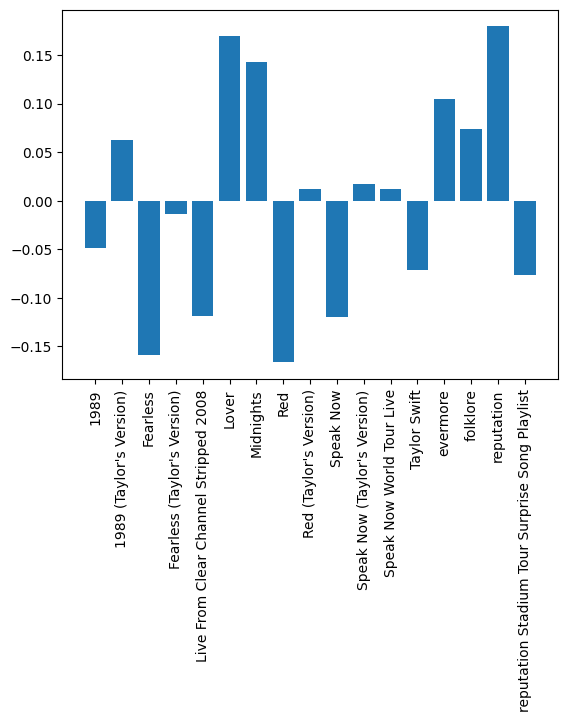

In [47]:
plt.bar(X_test.columns[15:], album_weights)
plt.xticks(rotation=90)
plt.show()

Veiem que els àlbums més recents (Midnights, evermore, folklore, Lover)...

0     -0.012696
1      0.015397
2      0.024603
3     -0.004019
4     -0.060980
         ...   
415   -0.036538
416   -0.049125
417    0.072973
418    0.021833
419   -0.016279
Name: popularity, Length: 420, dtype: float64


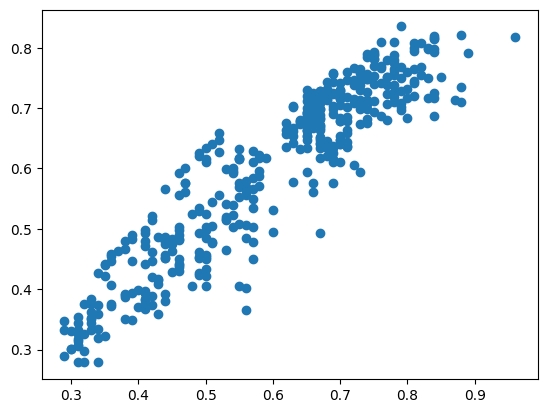

In [48]:
naive_prediction_error = y_train - y_pred
print(naive_prediction_error)

plt.scatter(y_train, y_pred)
plt.show()

In [49]:
mse = mean_squared_error(y_train, y_pred)
mse

0.0032939129972812883

In [50]:
R_squared = r2_score(y_train, y_pred)
norm_mse_sk = 1 - R_squared
norm_mse_sk, R_squared

(0.13811489101354357, 0.8618851089864564)

Cross validation

In [51]:
from sklearn.model_selection import LeaveOneOut

N = len(X_train)

lr_cv = LinearRegression()
lr_cv.fit(X_train, y_train)
folds_r2 = cross_val_score(lr_cv, X_train, y_train, cv = 10, scoring='r2')
lr_r2 = np.mean(folds_r2)
print(lr_r2)

0.8369966978647086


Veiem que el model lineal de moment explica molta variablitat.

#### Regularització

Ridge:

In [52]:
lambdas = [1e-10, 1e-5, 1e-3, 1e-2, 0.1, 0.5, 0.7, 0.8, 0.9, 1, 2, 10, 100, 200]

In [53]:
ridge_cv = RidgeCV(alphas=lambdas, cv = 10)
ridge_cv.fit(X_train, y_train)
print('Best Lambda:', ridge_cv.alpha_)
print('R2 SCORE: ', ridge_cv.best_score_)

Best Lambda: 0.8
R2 SCORE:  0.8399796471801071


In [54]:
abs(ridge_cv.coef_ - lr.coef_)

array([0.00703796, 0.0019238 , 0.00764397, 0.00877204, 0.00032319,
       0.03363348, 0.00190439, 0.00472039, 0.01566209, 0.00071678,
       0.00673023, 0.00081519, 0.00529414, 0.00211157, 0.00400775,
       0.00106208, 0.00558058, 0.00941841, 0.00150803, 0.01537343,
       0.01079459, 0.01054311, 0.00335743, 0.0002145 , 0.01083607,
       0.00500383, 0.00479077, 0.01103528, 0.00505757, 0.00415801,
       0.012603  , 0.00385244])

No hi ha hagut massa diferència

#### Lasso

Ridge:

In [55]:
lambdas = [1e-10,1e-5, 1e-4,1e-4,1e-3, 1e-2, 1e-1, 0.2, 0.3, 0.5, 0.7, 0.8, 1, 2, 10, 100, 200]

In [56]:
lasso_cv = LassoCV(alphas=lambdas, cv = 10)
lasso_cv.fit(X_train, y_train)
print('Best Lambda:', lasso_cv.alpha_)
lasso_r2 = r2_score(y_train, lasso_cv.predict(X_train))
print('R2 SCORE: ', lasso_r2)

Best Lambda: 0.0001
R2 SCORE:  0.8612130785196459


/home/gerard/Escriptori/UPC/22_2n-Q2/AA1/AA1-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008703677170095014, tolerance: 0.0008812333333333333
  model = cd_fast.enet_coordinate_descent_gram(
/home/gerard/Escriptori/UPC/22_2n-Q2/AA1/AA1-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007606507652650141, tolerance: 0.0008989383333333334
  model = cd_fast.enet_coordinate_descent_gram(
/home/gerard/Escriptori/UPC/22_2n-Q2/AA1/AA1-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010978334085886221, tolerance: 0.000936987857142857
  model = cd_fast

In [116]:
abs(lasso_cv.coef_ - lr.coef_)

array([3.88067942e-03, 1.71722557e-03, 7.80614117e-03, 2.59783792e-03,
       3.72638043e-04, 1.79073157e-02, 3.89900886e-03, 6.77346927e-03,
       1.77237198e-02, 4.38076245e+09, 2.89275643e+10, 7.59756083e-04,
       1.26345621e-02, 1.69904545e-02, 1.21165824e-02, 7.19366588e+09,
       7.19366588e+09, 2.81290343e+09, 2.17338984e+10, 7.19366588e+09,
       2.81290343e+09, 7.19366588e+09, 2.17338984e+10, 2.81290343e+09,
       2.81290343e+09, 2.17338984e+10, 7.19366588e+09, 7.19366588e+09,
       7.19366588e+09, 7.19366588e+09, 7.19366588e+09, 7.19366588e+09])

No hi ha hagut massa diferència

## Random forest i Decision tree

In [62]:
rf = RandomForestRegressor(oob_score=True)
model_rf = rf.fit(X_train, y_train)

y_pred_tree = model_rf.predict(X_train)

r2 = r2_score(y_train, y_pred_tree)
mse = mean_squared_error(y_train, y_pred_tree)
print(f'{mse = }')
print(f'{r2 = }')
print(f'{1-r2 = }')
print('OOB accuracy=', model_rf.oob_score_)

mse = 0.0008322764234534582
r2 = 0.9651023668162174
1-r2 = 0.034897633183782584
OOB accuracy= 0.8326346108919246


MOLT baix error -> Però segurament és degut a overfitting (salt entre r2_score i OOB score)
La precisió pel OOB set és bastant bona, però.

Podriem afegir GridSearch (tant al DecisionTree com al RandomForest) !

### GridSearch per Decision Tree

Anem a veure si un Decision Tree SOL és capaç de fer una bona regressió.

In [163]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

In [ ]:
scoring = {
    'r2': make_scorer(r2_score),
    'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
    'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False)
}

In [120]:
param_grid = {
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None],
    'criterion': ['squared_error'],
    'splitter': ['random'],
    'max_leaf_nodes': [15, 20, 25],
    'min_impurity_decrease': [0.0]
}

dt = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(dt, param_grid, scoring=scoring, refit='r2', return_train_score=True, n_jobs=-1)

grid_search.fit(X_train, y_train)
pass

In [121]:
scoring_cols = [
    'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'param_criterion', 'param_splitter', 'param_max_leaf_nodes', 'param_min_impurity_decrease',
    'mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error'
]

pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_r2', ascending=False)[scoring_cols].head()

,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,param_criterion,param_splitter,param_max_leaf_nodes,param_min_impurity_decrease,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error
68,10,2,2,None,squared_error,random,20,0.0,0.841932,-0.046737,-0.003743
70,10,4,2,None,squared_error,random,20,0.0,0.841932,-0.046737,-0.003743
69,10,3,2,None,squared_error,random,20,0.0,0.841932,-0.046737,-0.003743
91,10,5,3,None,squared_error,random,25,0.0,0.841433,-0.046643,-0.003751
90,10,4,3,None,squared_error,random,25,0.0,0.841433,-0.046643,-0.003751


Un bon decision tree! Quasi el 80% de la variància explicada per ambdós nivell de folds. És bàsicament tant bo com el RF sense Grid Search.

Coses a veure: hi ha poc overfitting perquè el r2 mitjà de la CV és quasi igual al de r2 de generalització?

### GridSearch per Random Forest

In [150]:
param_grid = {
    'n_estimators': [100, 200], # 200 is the best, tried for 10 and 100 too
    'max_depth': [9, 10, 11],  # values around 10. 8 was the best
    'min_samples_split': [8, 9, 10],  # values around 4
    'min_samples_leaf': [1, 2, 4],  # values around 7. 5 was best
    'max_features': [None],  # including None as it was the best in the previous run
    'criterion': ['squared_error'],
    'max_leaf_nodes': [40, 45, 50],
    'min_impurity_decrease': [0.0]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rf, param_grid, scoring=scoring, refit='r2', return_train_score=True, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

pass

In [148]:
scoring_cols = [
    'param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'param_criterion', 'param_max_leaf_nodes', 'param_min_impurity_decrease',
    'mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error'
]

pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_r2', ascending=False)[scoring_cols].head()

,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,param_criterion,param_max_leaf_nodes,param_min_impurity_decrease,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error
38,200,10,9,1,None,squared_error,45,0.0,0.836583,-0.046997,-0.003885
47,200,10,9,1,None,squared_error,50,0.0,0.836573,-0.046997,-0.003885
29,200,10,9,1,None,squared_error,40,0.0,0.836569,-0.047008,-0.003885
2,200,9,9,1,None,squared_error,40,0.0,0.836506,-0.047298,-0.003889
11,200,9,9,1,None,squared_error,45,0.0,0.836505,-0.047294,-0.003889


In [151]:
best_rf = RandomForestRegressor(oob_score=True,random_state=42,**best_params)
best_rf.fit(X_train, y_train)
print('OOB accuracy=', best_rf.oob_score_)

OOB accuracy= 0.8437094379464339


0.7921190677869969


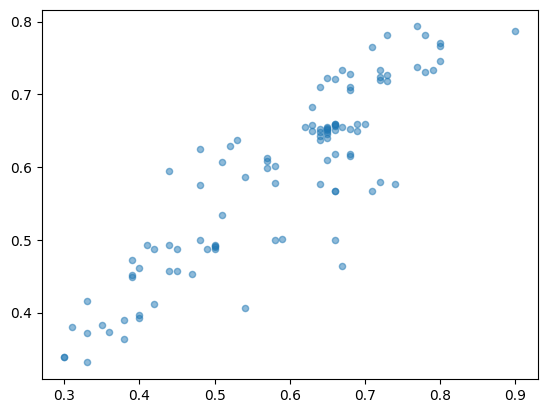

In [162]:
y_pred_best_rf = best_rf.predict(X_test)
print(r2_score(y_test, y_pred_best_rf))

plt.scatter(y_test, y_pred_best_rf, alpha=0.5, s=20)
plt.show()

## SVM

In [164]:
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor

In [165]:
def compute_metrics(y_pred, y_real):
    r2 = r2_score(y_pred,y_real)
    median_abs_e = median_absolute_error(y_pred, y_real)
    mse = mean_squared_error(y_pred, y_real)
    mean_abs_e = mean_absolute_error(y_pred, y_real)
    return [r2, mse, median_abs_e, mean_abs_e]

In [173]:
results = pd.DataFrame(columns=['Kernel', 'C', 'epsilon', 'R2', 'MSE', 'median_absolute_error', 'mean_absolute_error'])

Baseline el KNN

    Kernel  C epsilon        R2       MSE median_absolute_error mean_absolute_error
KNN      -  -       -  0.653778  0.005444                 0.041            0.056057


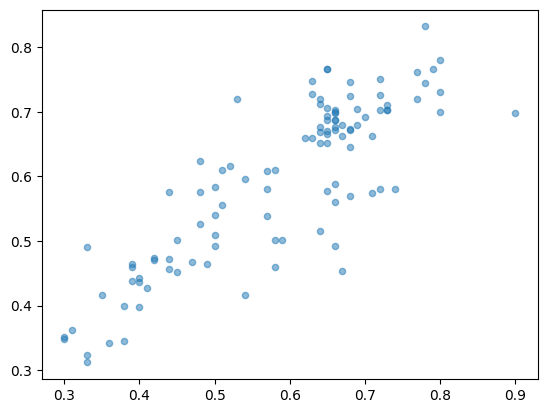

In [178]:
knn = KNeighborsRegressor()

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


plt.scatter(x=y_test, y=y_pred, alpha=0.5, s=20)

results.loc['KNN', :] = ['-', '-','-'] + compute_metrics(y_pred,y_test)
print(results)

/home/gerard/Escriptori/UPC/22_2n-Q2/AA1/AA1-env/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/gerard/Escriptori/UPC/22_2n-Q2/AA1/AA1-env/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Kernel,C,epsilon,R2,MSE,median_absolute_error,mean_absolute_error
LinearSVR-default,linear,1,0,0.77846,0.003802,0.026841,0.043269
KNN,-,-,-,0.653778,0.005444,0.041,0.056057


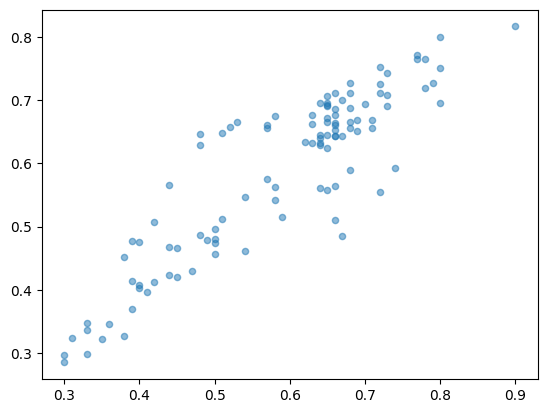

In [180]:
svm = LinearSVR()

svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

results.loc['LinearSVR-default', :] = ['linear',1,0] + compute_metrics(y_pred,y_test)

plt.scatter(x=y_test, y=y_pred, alpha=0.5, s=20)

results.sort_values(by='R2', ascending=False)

SVM with parameters "gridsearch"?

In [186]:
cv_results = pd.DataFrame(columns=['Kernel', 'C', 'epsilon', 'R2', 'MSE', 'median_absolute_error', 'mean_absolute_error'])

Cs = [5, 10, 15, 20, 30] # values less than 10
epsilons = [0.0001, 0.00001, 0.000001, 0.0000001, 0.0]
for c in Cs:
    for epsilon in epsilons:
        svm = SVR(kernel='linear', C=c,epsilon=epsilon)
        svm.fit(X_train,y_train)
        y_pred = svm.predict(X_test)
        cv_results.loc['LinearSVR-{}-{}'.format(c,epsilon), :] = ['linear', c, epsilon] + compute_metrics(y_pred,y_test)
        
best = cv_results.sort_values(by='R2',ascending=False).iloc[0,:]
results.loc['LinearSVR-best',:] = best

In [187]:
cv_results.sort_values(by='R2', ascending=False)

,Kernel,C,epsilon,R2,MSE,median_absolute_error,mean_absolute_error
LinearSVR-15-0.0,linear,15,0.0,0.768133,0.003914,0.02645,0.044056
LinearSVR-5-0.0001,linear,5,0.0001,0.767927,0.003913,0.025775,0.044017
LinearSVR-10-0.0001,linear,10,0.0001,0.767556,0.003917,0.025567,0.044076
LinearSVR-15-1e-06,linear,15,0.000001,0.766983,0.003924,0.025688,0.044219
LinearSVR-20-1e-07,linear,20,0.0,0.766954,0.003924,0.02566,0.044205
LinearSVR-30-0.0001,linear,30,0.0001,0.766899,0.003924,0.025239,0.04415
LinearSVR-10-1e-07,linear,10,0.0,0.766814,0.003925,0.025561,0.04419
LinearSVR-30-1e-05,linear,30,0.00001,0.766727,0.003928,0.025253,0.044238
LinearSVR-20-0.0001,linear,20,0.0001,0.766723,0.003923,0.025477,0.044192
LinearSVR-30-0.0,linear,30,0.0,0.766721,0.003926,0.025067,0.044252


In [ ]:
results.sort_values(by='R2', ascending=False)

,Kernel,C,epsilon,R2,MSE,median_absolute_error,mean_absolute_error
rbfSVR-best,rbf,2,0.00001,0.754999,0.005084,0.024258,0.042567
LinearSVR-best,linear,3,0,0.738915,0.005351,0.032457,0.045964
KNN,-,-,-,0.729857,0.005887,0.032,0.048848
LinearSVR-default,linear,1,0,0.720579,0.005936,0.03563,0.050124
polySVR-best,poly,50,0.001,0.671217,0.007383,0.03403,0.056425
RBF-SVR-default,RBF,1,0,0.583031,0.006231,0.047385,0.058155
rbf-SVR-default,rbf,1,0,0.583031,0.006231,0.047385,0.058155
poly-SVR-default,poly,1,0,0.455901,0.009243,0.063212,0.074462
sigmoidSVR-best,sigmoid,2,0.0,-0.153639,78.762266,3.796118,5.722851
sigmoid-SVR-default,sigmoid,1,0,-0.159837,19.803588,1.962415,2.868427


## Non-linear SVR

,Kernel,C,epsilon,R2,MSE,median_absolute_error,mean_absolute_error
rbfSVR-best,rbf,2,0.00001,0.754999,0.005084,0.024258,0.042567
LinearSVR-best,linear,3,0,0.738915,0.005351,0.032457,0.045964
KNN,-,-,-,0.729857,0.005887,0.032,0.048848
LinearSVR-default,linear,1,0,0.720579,0.005936,0.03563,0.050124
polySVR-best,poly,50,0.001,0.671217,0.007383,0.03403,0.056425
RBF-SVR-default,RBF,1,0,0.583031,0.006231,0.047385,0.058155
rbf-SVR-default,rbf,1,0,0.583031,0.006231,0.047385,0.058155
poly-SVR-default,poly,1,0,0.455901,0.009243,0.063212,0.074462
sigmoidSVR-best,sigmoid,2,0.0,-0.153639,78.762266,3.796118,5.722851
sigmoid-SVR-default,sigmoid,1,0,-0.159837,19.803588,1.962415,2.868427


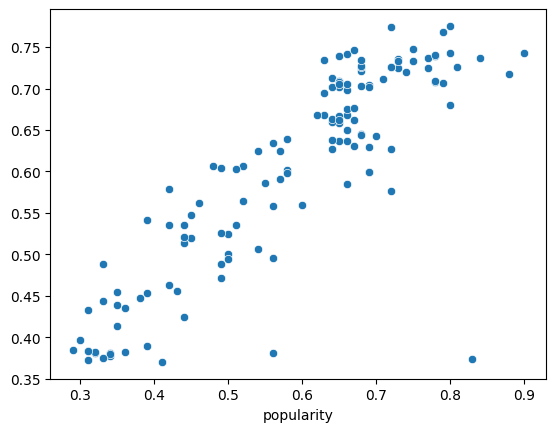

In [ ]:
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)

results.loc['RBF-SVR-default', :] = ['RBF',1,0]+ compute_metrics(y_pred,y_test)

sns.scatterplot(x=y_test, y=y_pred)
results.sort_values(by='R2', ascending=False)

In [ ]:

Cs = [1, 2, 2.5, 3, 5, 10, 15, 20, 30, 50]
epsilons = [0.001,0.0001,0.00001,0.000001, 0.0000001,0]
for kernel_type in ['rbf', 'sigmoid', 'poly']:
    
    svr = SVR(kernel=kernel_type)
    svr.fit(X_train,y_train)
    y_pred = svr.predict(X_test)

    results.loc[kernel_type+'-SVR-default', :] = [kernel_type,1,0]+ compute_metrics(y_pred,y_test)
    
    
    cv_results_rbf = pd.DataFrame(columns=['Kernel', 'C', 'epsilon', 'R2', 'MSE', 'median_absolute_error', 'mean_absolute_error'])
    for c in Cs:
        for epsilon in epsilons:
            svm = SVR(kernel=kernel_type, C=c,epsilon=epsilon)
            svm.fit(X_train,y_train)
            y_pred = svm.predict(X_test)
            cv_results_rbf.loc[kernel_type+'SVR-{}-{}'.format(c,epsilon), :] = [kernel_type, c, epsilon] + compute_metrics(y_pred,y_test)
            
    best = cv_results_rbf.sort_values(by='R2',ascending=False).iloc[0,:]
    results.loc[kernel_type+'SVR-best',:] = best


results.sort_values(by='R2', ascending=False)

,Kernel,C,epsilon,R2,MSE,median_absolute_error,mean_absolute_error
rbfSVR-best,rbf,2,0.00001,0.754999,0.005084,0.024258,0.042567
LinearSVR-best,linear,2,0,0.738811,0.005348,0.032429,0.045939
KNN,-,-,-,0.729857,0.005887,0.032,0.048848
LinearSVR-default,linear,1,0,0.720579,0.005936,0.03563,0.050124
polySVR-best,poly,50,0.001,0.671217,0.007383,0.03403,0.056425
RBF-SVR-default,RBF,1,0,0.583031,0.006231,0.047385,0.058155
rbf-SVR-default,rbf,1,0,0.583031,0.006231,0.047385,0.058155
poly-SVR-default,poly,1,0,0.455901,0.009243,0.063212,0.074462
sigmoidSVR-best,sigmoid,2,0.0,-0.153639,78.762266,3.796118,5.722851
sigmoid-SVR-default,sigmoid,1,0,-0.159837,19.803588,1.962415,2.868427


In [ ]:
results.sort_values(by='R2', ascending=False)

,Kernel,C,epsilon,R2,MSE,median_absolute_error,mean_absolute_error
rbfSVR-best,rbf,2,0.00001,0.754999,0.005084,0.024258,0.042567
LinearSVR-best,linear,2,0,0.738811,0.005348,0.032429,0.045939
KNN,-,-,-,0.729857,0.005887,0.032,0.048848
LinearSVR-default,linear,1,0,0.720579,0.005936,0.03563,0.050124
polySVR-best,poly,50,0.001,0.671217,0.007383,0.03403,0.056425
RBF-SVR-default,RBF,1,0,0.583031,0.006231,0.047385,0.058155
rbf-SVR-default,rbf,1,0,0.583031,0.006231,0.047385,0.058155
poly-SVR-default,poly,1,0,0.455901,0.009243,0.063212,0.074462
sigmoidSVR-best,sigmoid,2,0.0,-0.153639,78.762266,3.796118,5.722851
sigmoid-SVR-default,sigmoid,1,0,-0.159837,19.803588,1.962415,2.868427


In [ ]:
kernel_type='poly'
svr = SVR(kernel=kernel_type)
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)

results.loc[kernel_type+'-SVR-default', :] = [kernel_type,1,0]+ compute_metrics(y_pred,y_test)

Cs = [10, 15, 20, 25, 30, 50]
epsilons = [0.001,0.0001,0.00001,0.000001, 0.0000001,0]

cv_results_rbf = pd.DataFrame(columns=['Kernel', 'C', 'epsilon', 'R2', 'MSE', 'median_absolute_error', 'mean_absolute_error'])
for c in Cs:
    for epsilon in epsilons:
        svm = SVR(kernel=kernel_type, C=c,epsilon=epsilon)
        svm.fit(X_train,y_train)
        y_pred = svm.predict(X_test)
        cv_results_rbf.loc[kernel_type+'SVR-{}-{}'.format(c,epsilon), :] = [kernel_type, c, epsilon] + compute_metrics(y_pred,y_test)
        
best = cv_results_rbf.sort_values(by='R2',ascending=False).iloc[0,:]
results.loc[kernel_type+'SVR-best',:] = best

In [ ]:
results.sort_values(by='R2', ascending=False)

,Kernel,C,epsilon,R2,MSE,median_absolute_error,mean_absolute_error
rbfSVR-best,rbf,2,0.00001,0.754999,0.005084,0.024258,0.042567
LinearSVR-best,linear,2,0,0.738811,0.005348,0.032429,0.045939
KNN,-,-,-,0.729857,0.005887,0.032,0.048848
LinearSVR-default,linear,1,0,0.720579,0.005936,0.03563,0.050124
polySVR-best,poly,50,0.001,0.671217,0.007383,0.03403,0.056425
RBF-SVR-default,RBF,1,0,0.583031,0.006231,0.047385,0.058155
rbf-SVR-default,rbf,1,0,0.583031,0.006231,0.047385,0.058155
poly-SVR-default,poly,1,0,0.455901,0.009243,0.063212,0.074462
sigmoidSVR-best,sigmoid,2,0.0,-0.153639,78.762266,3.796118,5.722851
sigmoid-SVR-default,sigmoid,1,0,-0.159837,19.803588,1.962415,2.868427


## Outlier Removal

<Axes: xlabel='popularity'>

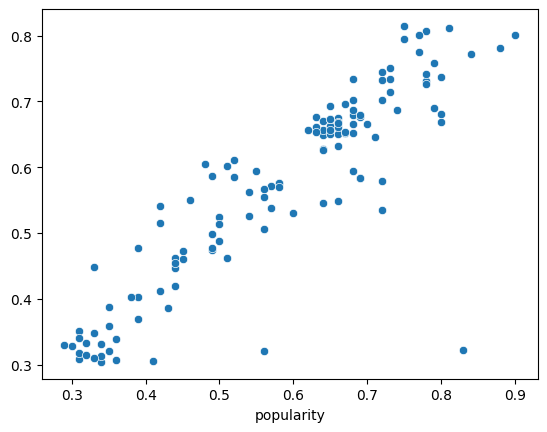

In [ ]:
best_svm = SVR(kernel='rbf', C=2.5, epsilon=0.0)
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)

sns.scatterplot(x=y_test, y=y_pred)

In [ ]:
sorted_differences = np.abs(y_test-y_pred).sort_values(ascending=False)
sorted_differences

name
I Don’t Wanna Live Forever (Fifty Shades Darker)    0.507602
So It Goes...                                       0.239142
Our Song                                            0.185210
Style                                               0.140863
champagne problems                                  0.132042
                                                      ...   
Style (Taylor's Version)                            0.001344
Welcome To New York (Taylor's Version)              0.001223
Midnight Rain                                       0.001167
Bejeweled                                           0.000849
This Love                                           0.000783
Name: popularity, Length: 132, dtype: float64

In [ ]:
sorted_differences.index[0]

'I Don’t Wanna Live Forever (Fifty Shades Darker)'

In [ ]:
st_songs.loc[sorted_differences.index[0],:]

album                                             reputation Stadium Tour Surprise Song Playlist
track_number                                                                            3.515456
acousticness                                                                           -2.045598
danceability                                                                            0.746177
energy                                                                                  0.393029
liveness                                                                               -3.749917
loudness                                                                                0.535105
tempo                                                                                   0.354159
valence                                                                                 0.075751
popularity                                                                                  0.83
duration                      

## Using boosting

We combine boosting with gridsearch to obtain the best estimators possible

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {  # ja he provat amb molts més valors, aquests son els que millor ho fan
    'n_estimators': [200], #[100, 150, 200],
    'learning_rate': [0.05], #[0.1, 0.05, 0.02],
    'max_depth': [4], #[2, 3, 4, 5],
    'loss': ['squared_error']
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=10, refit='r2', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"The r2 score on test set: {r2:.4f}")

The r2 score on test set: 0.8018


In [ ]:
scoring_cols = ['param_n_estimators', 'param_learning_rate', 'param_max_depth', 'param_loss', 'mean_train_score', 'mean_test_score']
pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)[scoring_cols].head()

,param_n_estimators,param_learning_rate,param_max_depth,param_loss,mean_train_score,mean_test_score
0,200,0.05,4,squared_error,0.963821,0.814053


We see that there is a bunch of overfitting.

In [ ]:
importances = grid_search.best_estimator_.feature_importances_

# Print feature importances
for feature_name, importance in zip(X_train.columns, importances):
    print(f"{feature_name}: {importance:.4f}")

danceability: 0.0119
energy: 0.0198
liveness: 0.0217
loudness: 0.0352
tempo: 0.0122
valence: 0.0137
duration: 0.0259
taylors_version: 0.0364
performed_live: 0.3042
not_first_release: 0.0718
low_instrumentalness: 0.0000
medium_instrumentalness: 0.0000
spoken_section: 0.0000
Midnights: 0.0248
Lover: 0.0293
reputation: 0.0213
Red (Taylor's Version): 0.0000
folklore: 0.0139
Speak Now (Taylor's Version): 0.0006
Fearless (Taylor's Version): 0.0024
Live From Clear Channel Stripped 2008: 0.0000
Speak Now: 0.0625
Fearless: 0.1012
1989: 0.0194
Taylor Swift: 0.0037
1989 (Taylor's Version): 0.0050
Red: 0.1420
evermore: 0.0109
Speak Now World Tour Live: 0.0070
reputation Stadium Tour Surprise Song Playlist: 0.0031


we can see that performed live is very important, and that not_first_release is also pretty important. Some albums are much more important than others.

In [ ]:
_, X_test, _, _ = train_test_split(st_songs, y, test_size=0.25, random_state=42)
X_test
X_test['y_pred'] = y_pred

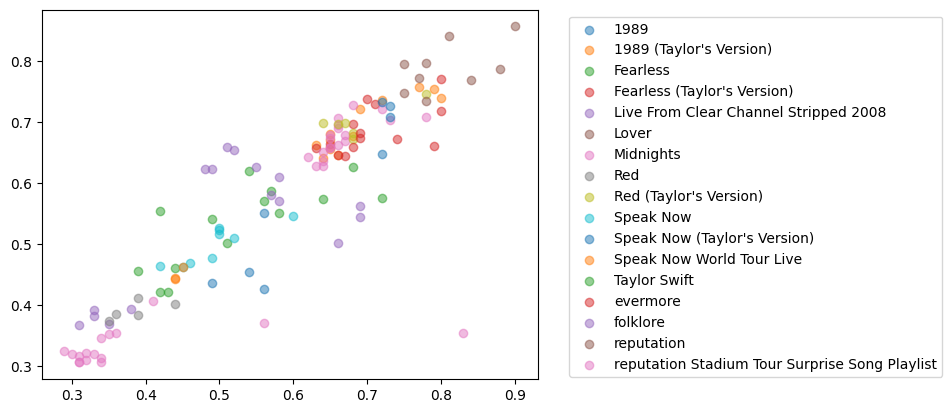

In [ ]:
X_test['album_code'] = X_test['album'].astype('category').cat.codes
album_names = X_test['album'].astype('category').cat.categories

for album in album_names:
    subset = X_test[X_test['album'] == album]
    plt.scatter(subset['popularity'], subset['y_pred'], label=album, alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

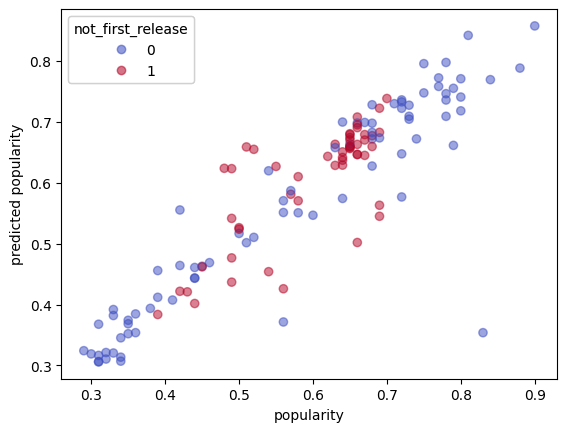

In [ ]:
scatter = plt.scatter(X_test['popularity'], X_test['y_pred'], alpha=0.5, c=X_test['not_first_release'], cmap='coolwarm')
plt.xlabel('popularity')
plt.ylabel('predicted popularity')

legend1 = plt.legend(*scatter.legend_elements(), title="not_first_release")
plt.gca().add_artist(legend1)

plt.show()